<a href="https://colab.research.google.com/github/sp2743/datamining-samplequestion/blob/main/OLAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### A database is given to you as follows:

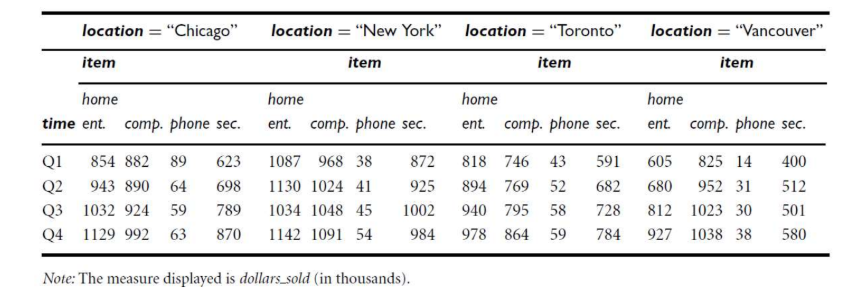

### 1. Store your data in a numpy 3-D array.        [10]

### 2. Write a menu driven program to perform OLAP operations. [10]

    Program must have menu options as follows:
        a. slice
             |-choose the dimension and particular value for slice
            
        b. Dice
            |-provide all the required indecies to take out a dice from the Cube.
            
        c. Roll-up operation
            |-choose the dimension

    For all three operations, create separate functions and return the output.

### 3. Execute your program on following queries. [80]

            3.1. slice on location dimension for 'Chicago'.
            3.2. slice on location dimension for 'New York'.
            
            3.3. slice on time dimension for 'Q1'.
            3.4. slice on time dimension for 'Q3'.
            
            3.5  Take out a Dice for first 2 quarters for security and phone at Chicago and Toronto
            3.6  Take out a Dice for last 2 quarters for computer and phone at New York and Toronto
            
            3.7  Roll-up on time dimension to find city wise sells of each item.
            3.8  Roll-up on item dimension to find city wise sells of each quarter.
            
            

In [2]:
import numpy as np
import pandas as pd

In [3]:
#q1 stroing data in 3-D array

time_labels = ["Q1", "Q2", "Q3", "Q4"]
location_labels = ["Chicago", "New York", "Toronto", "Vancouver"]
item_labels = ["entertainment", "computer", "phone", "security"]

data = np.array([
    # Q1
    [[854, 882, 89, 623], [1087, 968, 38, 872], [818, 746, 43, 591], [605, 825, 14, 400]],
    # Q2
    [[943, 890, 64, 698], [1130, 1024, 41, 925], [894, 769, 52, 682], [680, 952, 31, 512]],
    # Q3
    [[1032, 924, 59, 789], [1034, 1048, 45, 1002], [940, 795, 58, 728], [812, 1023, 30, 501]],
    # Q4
    [[1129, 992, 63, 870], [1142, 1091, 54, 984], [978, 864, 59, 784], [927, 1038, 38, 580]],
])



In [4]:
data

array([[[ 854,  882,   89,  623],
        [1087,  968,   38,  872],
        [ 818,  746,   43,  591],
        [ 605,  825,   14,  400]],

       [[ 943,  890,   64,  698],
        [1130, 1024,   41,  925],
        [ 894,  769,   52,  682],
        [ 680,  952,   31,  512]],

       [[1032,  924,   59,  789],
        [1034, 1048,   45, 1002],
        [ 940,  795,   58,  728],
        [ 812, 1023,   30,  501]],

       [[1129,  992,   63,  870],
        [1142, 1091,   54,  984],
        [ 978,  864,   59,  784],
        [ 927, 1038,   38,  580]]])

In [5]:
# menu driven program to perform OLAP operation such as slice,dice and roll-up operation
def slice_cube(cube, dim, index):
    """Extracts a slice along a specific dimension."""
    return np.take(cube, indices=index, axis=dim)

# Function for DICE Operation
def dice_cube(cube, dim_indices):
    """Extracts a sub-cube based on given dimension indices."""
    return cube[np.ix_(*dim_indices)]

# Function for ROLL-UP Operation
def rollup_cube(cube, dim):
    """Performs roll-up (aggregation) along a given dimension."""
    return np.sum(cube, axis=dim)

# Menu-driven program
while True:
    print("\nOLAP Operations:")
    print("1. Slice")
    print("2. Dice")
    print("3. Roll-up")
    print("4. Exit")

    choice = int(input("Enter your choice: "))

    if choice == 1:
        dim = int(input("Enter dimension to slice (0=Time, 1=Location, 2=items): "))
        index = int(input("Enter index to slice: "))
        result = slice_cube(data, dim, index)
        print("\nSliced Data:\n", result)

    elif choice == 2:
        indices = []
        for dim in range(3):
            idx = list(map(int, input(f"Enter indices for dimension {dim} (comma-separated): ").split(',')))
            indices.append(idx)
        result = dice_cube(data, indices)
        print("\nDiced Data:\n", result)

    elif choice == 3:
        dim = int(input("Enter dimension to roll-up (0=Time, 1=Location, 2=items): "))
        result = rollup_cube(data, dim)
        print("\nRolled-up Data:\n", result)

    elif choice == 4:
        print("Exiting...")
        break

    else:
        print("Invalid choice! Please try again.")


OLAP Operations:
1. Slice
2. Dice
3. Roll-up
4. Exit
Enter your choice: 1
Enter dimension to slice (0=Time, 1=Location, 2=items): 0
Enter index to slice: 3

Sliced Data:
 [[1129  992   63  870]
 [1142 1091   54  984]
 [ 978  864   59  784]
 [ 927 1038   38  580]]

OLAP Operations:
1. Slice
2. Dice
3. Roll-up
4. Exit
Enter your choice: 4
Exiting...


### 3.1 slice on location dimension for 'Chicago'.

In [6]:
chicago_index = location_labels.index("Chicago")
result = slice_cube(data, 1, chicago_index)
print("\nSliced Data:\n", result)


Sliced Data:
 [[ 854  882   89  623]
 [ 943  890   64  698]
 [1032  924   59  789]
 [1129  992   63  870]]


### 3.2 slice on location for 'New York'

In [7]:
newyork_index = location_labels.index("New York")
result = slice_cube(data, 1, newyork_index)
print("\nSliced Data:\n", result)



Sliced Data:
 [[1087  968   38  872]
 [1130 1024   41  925]
 [1034 1048   45 1002]
 [1142 1091   54  984]]


### 3.3 slice on time dimension for 'Q1'

In [9]:
Q1_index = time_labels.index("Q1")
result = slice_cube(data, 0, Q1_index)
print("\nSliced Data:\n", result)


Sliced Data:
 [[ 854  882   89  623]
 [1087  968   38  872]
 [ 818  746   43  591]
 [ 605  825   14  400]]


### 3.4 slice on time dimension for 'Q3'

In [10]:
Q3_index = time_labels.index("Q3")
result = slice_cube(data, 0, Q3_index)
print("\nSliced Data:\n", result)


Sliced Data:
 [[1032  924   59  789]
 [1034 1048   45 1002]
 [ 940  795   58  728]
 [ 812 1023   30  501]]


### 3.5 Take out a Dice for first 2 quarters for security and phone at Chicago and Toronto

In [11]:
location_indices = [location_labels.index("Chicago"), location_labels.index("Toronto")]
time_indices = [time_labels.index('Q1'),time_labels.index('Q2')]
item_indices = [item_labels.index("security"), item_labels.index("phone")]
result = dice_cube(data, [time_indices, location_indices, item_indices])
print("\nDiced Data:\n", result)


Diced Data:
 [[[623  89]
  [591  43]]

 [[698  64]
  [682  52]]]


### 3.6 Take out a Dice for last 2 quarters for computer and phone at New York and Toronto

In [12]:
location_indices = [location_labels.index("New York"), location_labels.index("Toronto")]
time_indices = [time_labels.index('Q3'),time_labels.index('Q4')]
item_indices = [item_labels.index("computer"), item_labels.index("phone")]
result = dice_cube(data, [time_indices, location_indices, item_indices])
print("\nDiced Data:\n", result)


Diced Data:
 [[[1048   45]
  [ 795   58]]

 [[1091   54]
  [ 864   59]]]


### 3.7  Roll-up on time dimension to find city wise sells of each item.

In [13]:
result=rollup_cube(data,0)
print("\nRolled-up Data:\n", result)


Rolled-up Data:
 [[3958 3688  275 2980]
 [4393 4131  178 3783]
 [3630 3174  212 2785]
 [3024 3838  113 1993]]


### 3.8 Roll-up on item dimension to find city wise sells of each quarter.

In [14]:
result=rollup_cube(data,2)
print("\nRolled-up Data:\n", result)


Rolled-up Data:
 [[2448 2965 2198 1844]
 [2595 3120 2397 2175]
 [2804 3129 2521 2366]
 [3054 3271 2685 2583]]
